This Notebook introduces various methods of Text Representation from One-hot encoding to encoding using Tranformer architecture. It uses the Quotes Dataset and demonstrates approaches to  encoding such as Semantic Search, Clustering, topic recognition, Retrieval Augmented Generation, etc.

References:

What are Embeddings by Vicki Boykis
https://vickiboykis.com/what_are_embeddings

Practical Natural Language Processing: A Comprehensive Guide to Building Real-World NLP Systems https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/


Compiled by Srikar Reddy Gopaladinne

Updated by RTS, March 2024



Encoding essentially means transforming a given text into numerical form so that it can be fed into an algorithm. In NLP parlance, this conversion of raw text to a suitable numerical form is called text representation.

Mathematically representing images, video, and speech is straightforward because the data is collected in numerical form in the first place.

Here are the tasks involved while translating text into numbers.

1. Break the sentence into lexical units such as lexemes, words, and phrases
2. Derive the meaning for each of the lexical units
3. Understand the syntactic (grammatical) structure of the sentence
4. Understand the context in which the sentence appears

Transfering semantics of a sentence into a numerical representation accurs through the combination of the above points. Thus, any good text representation scheme must facilitate the extraction of those data points to reflect the linguistic properties of the text.

Text units (characters, phonemes, words, phrases, sentences, paragraphs, and documents) will be represented with vectors. This is known as the vector space model. What differentiates one scheme from another is how well the resulting vector captures the linguistic properties of the text it represents.

Different Methods:

- One-Hot Encoding
- Bag of words
- Bag of N-grams
- TF-IDF
- Transformers

## One-hot encoding

 In one-hot encoding, each word w in the corpus vocabulary is given a unique integer ID wid that is between 1 and |V|, where V is the set of the corpus vocabulary. Each word is then represented by a V-dimensional binary vector of 0s and 1s. This is done via a |V| dimension vector filled with all 0s. Where index = wid, we simply put a 1. The representation for individual words is then combined to form a sentence representation.

Let’s understand this via our toy corpus containing 6 words and 4 sentences.
Prepreocess the sentences by removing the periods and lowercasing the letters.

In [1]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

In the bespoke approach, we  map each of the six words to unique IDs: dog = 1, bites = 2, man = 3, meat = 4 , food = 5, eats = 6.

In [2]:
#Build the vocabulary
vocab = {}
count = 0
for doc in processed_docs:
    for word in doc.split():
        if word not in vocab:
            count = count +1
            vocab[word] = count
print(vocab)

{'dog': 1, 'bites': 2, 'man': 3, 'eats': 4, 'meat': 5, 'food': 6}


 Let’s consider the document D1: “dog bites man”.

As per the scheme, each word is a six-dimensional vector.

Dog is represented as [1 0 0 0 0 0], as the word “dog” is mapped to ID 1.

Bites is represented as [0 1 0 0 0 0], and so on and so forth.

Thus, D1 (dog bites man) is represented as
[ [1 0 0 0 0 0] [0 1 0 0 0 0] [0 0 1 0 0 0]].

D4 (man eats food) is represented as
[ [ 0 0 1 0 0] [0 0 0 0 1 0] [0 0 0 0 0 1]].

In [3]:
#Get one hot representation for any string based on this vocabulary.
#If the word exists in the vocabulary, its representation is returned.
#If not, a list of zeroes is returned for that word.
def get_onehot_vector(somestring):
    onehot_encoded = []
    for word in somestring.split():
        temp = [0]*len(vocab)
        if word in vocab:
            temp[vocab[word]-1] = 1 # -1 is to take care of the fact indexing in array starts from 0 and not 1
        onehot_encoded.append(temp)
    return onehot_encoded

In [4]:
print(processed_docs[1])
get_onehot_vector(processed_docs[1]) #one hot representation for a text from our corpus.

man bites dog


[[0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0]]

In [5]:
get_onehot_vector("man and dog are good")
#one hot representation for a random text, using the above vocabulary

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

If new terms are introduced to the existing corpus, they are represented as
[0, 0, 0, 0, 0, 0]

See below example where 'good' is not included and represented as
[0, 0, 0, 0, 0, 0]

In [6]:
get_onehot_vector("man and man are good")

[[0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

## One-hot encoding using scikit -learn
##### We encode our corpus as a one-hot numeric array using scikit-learn's OneHotEncoder.
##### We will demostrate:

*   One Hot Encoding: In one-hot encoding, each word w in corpus vocabulary is given a unique integer id wid that is between 1 and |V|, where V is the set of corpus vocab. Each word is then represented by a V-dimensional binary vector of 0s and 1s.

*   Label Encoding: In Label Encoding, each word w in our corpus is converted into a numeric value between 0 and n-1 (where n refers to number of unique words in our corpus).

##### Link for the official documentation  [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

In [7]:
!pip install scikit-learn

In [8]:
S1 = 'dog bites man'
S2 = 'man bites dog'
S3 = 'dog eats meat'
S4 = 'man eats food'

In [9]:
# why 8 slots?
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

data = [S1.split(), S2.split(), S3.split(), S4.split()]
values = data[0]+data[1]+data[2]+data[3]
print("The data: ",values)

#Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("Label Encoded:",integer_encoded)

#One-Hot Encoding
onehot_encoder = OneHotEncoder()
onehot_encoded = onehot_encoder.fit_transform(data).toarray()
print("Onehot Encoded Matrix:\n",onehot_encoded)


The data:  ['dog', 'bites', 'man', 'man', 'bites', 'dog', 'dog', 'eats', 'meat', 'man', 'eats', 'food']
Label Encoded: [1 0 4 4 0 1 1 2 5 4 2 3]
Onehot Encoded Matrix:
 [[1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 1. 0. 1. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 1. 0. 0.]]


Issues:
1. Out of vocabulary (OOV) problem: Say we train a model using our toy corpus. At runtime, we get a sentence: “man eats fruits.” The training data didn’t include “fruit” and there is no way to represent it in our model.

2. Variable Length representation: This representation does not give a fixed-length representation for text, i.e., if a text has 10 words, you get a longer representation as compared to a text with 5 words. For most learning algorithms, we need the feature vectors to be of the same length.

3. Sparse Representation: The size of a one-hot vector is directly proportional to size of the vocabulary, and most real-world corpora have large vocabularies. This results in a sparse representation where most of the entries in the vectors are zeroes, making it computationally inefficient to store, compute with, and learn from (sparsity leads to overfitting).

4. The meaning of the word is not taken into consideration: It treats words as atomic units and has no notion of (dis)similarity between words nor of their position in the text.

## Bag of Words
Bag of words (BoW) is a classical text representation technique that has been used commonly in NLP, especially in text classification problems. The key idea behind it is as follows: represent a text as a bag (collection) of words while ignoring the order and context. The basic intuition behind it is that it assumes that the text belonging to a given class in the dataset is characterized by a unique set of words. If two text pieces have nearly the same words, then they belong to the same bag (class).



In [11]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

Similar to one-hot encoding, BoW maps words to unique integer IDs between 1 and |V|. Each document in the corpus is then converted into a vector of |V| dimensions where in the ith component of the vector, i = wid, is simply the number of times the word w occurs in the document, i.e., we score each word in V by their occurrence count in the document.

If dog = 1, bites = 2, man = 3, meat = 4 , food = 5, eats = 6,

D1(dog bites man) becomes [1 1 1 0 0 0].

This is because the first three words in the vocabulary appeared exactly once in D1, and the last three did not appear at all.

D4(man eats food) becomes [0 0 1 0 1 1].

Now, let's find a bag of words representation. We will use CountVectorizer from sklearn.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#look at the documents list
print("Our corpus: ", processed_docs)

count_vect = CountVectorizer()
#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary is: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our corpus:  ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']
Our vocabulary is:  {'dog': 1, 'bites': 0, 'man': 4, 'eats': 2, 'meat': 5, 'food': 3}
BoW representation for 'dog bites man':  [[1 1 0 0 1 0]]
BoW representation for 'man bites dog:  [[1 1 0 0 1 0]]
Bow representation for 'dog and dog are friends': [[0 2 0 0 0 0]]


In the above code, we represented the text taking the frequency of words into account. Sometimes we don't care about frequency and only want to know whether a word appeared in a text or not. Then document is represented as a vector of 0s and 1s. We will use the option binary=True in CountVectorizer for this purpose. Research has suggested that a representation without considering frequency is useful for sentiment analysis.

In [13]:
#BoW with binary vectors
count_vect = CountVectorizer(binary=True)
count_vect.fit(processed_docs)
temp = count_vect.transform(["dog and dog are friends"])
print("Bow representation for 'dog and dog are friends':", temp.toarray())

Bow representation for 'dog and dog are friends': [[0 1 0 0 0 0]]


Pros:
1. BoW is fairly simple to understand and implement.

2. Semantic Similarity: With this representation, documents having the same words will have their vector representations closer to each other in Euclidean space as compared to documents with completely different words. The distance between D1 (dog bites man) and D2 (man bites dog) is 0 as compared to the distance between D1 and D4, which is 2. Thus, the vector space resulting from the BoW scheme captures the semantic similarity of documents.

3. We have a fixed-length encoding for any sentence of arbitrary length.

Issues:
1. Size of the vector: The size of the vector increases with the size of the vocabulary. One way to control it is by limiting the vocabulary to n number of the most frequent words.

2. Lack of semantic understanding: It does not capture the similarity between different words that mean the same thing. Say we have three documents: “I run”, “I ran”, and “I ate”. BoW vectors of all three documents will be equally apart.

3. This representation does not have any way to handle out of vocabulary words (i.e., new words that were not seen in the corpus that was used to build the vectorizer).

4. Loss of uniqueness: As the name indicates, it is a “bag” of words—word order information is lost in this representation. Both D1 and D2 will have the same representation in this scheme.

## Bag of N-Grams

One hot encoding, BoW and TF-IDF treat words as independent units. There is no notion of phrases or word ordering. Bag of Ngrams (BoN) approach tries to remedy this. It does so by breaking text into chunks of n countigous words/tokens. This can help us capture some context, which earlier approaches could not do.

In [14]:
#our corpus
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]

processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

Let’s construct a 2-gram (a.k.a. bigram) model

The set of all bigrams in the corpus is as follows:

{dog bites, bites man, man bites, bites dog, dog eats, eats meat, man eats, eats food}.

Then, BoN representation consists of an eight-dimensional vector for each document.

The bigram representation for the first two documents is as follows:

D1(dog bites man) : [1,1,0,0,0,0,0,0],

D2(man bites dog) : [0,0,1,1,0,0,0,0].

The other two documents follow similarly.

Note that the BoW scheme is a special case of the BoN scheme, with n=1.

n=2 is called a “bigram model,” and n=3 is called a “trigram model.”

In NLP parlance, the BoN scheme is also called “n-gram feature selection.”

CountVectorizer can be used for getting a Bag of N-grams representation as well, using its ngram_range argument.

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

#Ngram vectorization example with count vectorizer and uni, bi, trigrams
count_vect = CountVectorizer(ngram_range=(1,3))

#Build a BOW representation for the corpus
bow_rep = count_vect.fit_transform(processed_docs)

#Look at the vocabulary mapping
print("Our vocabulary: ", count_vect.vocabulary_)

#see the BOW rep for first 2 documents
print("BoW representation for 'dog bites man': ", bow_rep[0].toarray())
print("BoW representation for 'man bites dog: ",bow_rep[1].toarray())

#Get the representation using this vocabulary, for a new text
temp = count_vect.transform(["dog and dog are friends"])

print("Bow representation for 'dog and dog are friends':", temp.toarray())

Our vocabulary:  {'dog': 3, 'bites': 0, 'man': 12, 'dog bites': 4, 'bites man': 2, 'dog bites man': 5, 'man bites': 13, 'bites dog': 1, 'man bites dog': 14, 'eats': 8, 'meat': 17, 'dog eats': 6, 'eats meat': 10, 'dog eats meat': 7, 'food': 11, 'man eats': 15, 'eats food': 9, 'man eats food': 16}
BoW representation for 'dog bites man':  [[1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0]]
BoW representation for 'man bites dog:  [[1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0]]
Bow representation for 'dog and dog are friends': [[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


##### The number of features (and hence the size of the feature vector) increased substantially to represent  the same data, compared to the ther single word based representations.

Advantages"

1. Better context and semantic similarity: It captures some context and word-order information in the form of n-grams. Thus, resulting vector space is able to capture some semantic similarity. Documents having the same n-grams will have their vectors closer to each other in Euclidean space as compared to documents with completely different n-grams

Issues:
1. Large vector size: As n increases, dimensionality (and therefore sparsity) only increases rapidly.

2. It still provides no way to address the 'out of vocabulary' problem.

## TF-IDF

 TF-IDF aims to quantify the importance of a given word relative to other words in the document and in the corpus. It was commonly used representation scheme for information retrieval systems.

The intuition behind TF-IDF is as follows: if a word w appears many times in a document but does not occur much in the rest of the documents dj in the corpus, then the word w must be of great importance to the document di. The importance of w should increase in proportion to its frequency in di, but at the same time, its importance should decrease in proportion to the word’s frequency in other documents dj in the corpus. Mathematically, this is captured using two quantities: term frequency and in verse term frequency. The two are then combined to arrive at the TF-IDF score.

TF (term frequency) measures how often a term or word occurs in a given document. Since different documents in the corpus may be of different lengths, a term may occur more often in a longer document as compared to a shorter document. To normalize these counts, we divide the number of occurrences by the length of the document. TF of a term t in a document d is defined as:

TF(t, d) = (Number of occurrences of term t in document d) / (Total number of terms in document d)

IDF (inverse document frequency) measures the importance of the term across a corpus. In computing TF, all terms are given equal importance (weightage). IDF weighs down the terms that are very common across a corpus and weighs up the rare terms. IDF of a term t is calculated as follows:

IDF(t) = log((Total number of documents in the corpus) / (Number of documents with term t in them))

The TF-IDF score is a product of these two terms. Thus, TF-IDF score = TF * IDF.

Let’s compute TF-IDF scores for the sample corpus. Some terms appear in only one document, some appear in two, while others appear in three documents. The size of our corpus is N=4.


In [16]:
documents = ["Dog bites man.", "Man bites dog.", "Dog eats meat.", "Man eats food."]
processed_docs = [doc.lower().replace(".","") for doc in documents]
processed_docs

['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

TF-IDF Scores, manual representation

| Word | TF score | IDF score | TF-IDF score |
|---|---|---|---|
| dog | ⅓ (0.3333) | log₂(4/3) (0.4114) | 0.136 |
| bites | ⅙ (0.1667) | log₂(4/2) (1.0000) | 0.170 |
| man | ⅓ (0.3333) | log₂(4/3) (0.4114) | 0.136 |
| eats | ⅙ (0.1667) | log₂(4/2) (1.0000) | 0.170 |
| meat | 1/12 (0.0833) | log₂(4/1) (2.0000) | 0.170 |
| food | 1/12 (0.0833) | log₂(4/1) (2.0000) | 0.170 |




The code below shows how to get the TF-IDF representation of a document using sklearn's TfidfVectorizer.

Sklearn uses a different formula to account for mathematical errors, and normalizes the results [0-1]

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
bow_rep_tfidf = tfidf.fit_transform(processed_docs)

#IDF for all words in the vocabulary
print("IDF for all words in the vocabulary",tfidf.idf_)
print("-"*10)
#All words in the vocabulary.
print("All words in the vocabulary",tfidf.get_feature_names_out())
print("-"*10)

#TFIDF representation for all documents in our corpus
print("TFIDF representation for all documents in our corpus\n",bow_rep_tfidf.toarray())
print("-"*10)

temp = tfidf.transform(["dog and man are friends"])
print("Tfidf representation for 'dog and man are friends':\n", temp.toarray())

IDF for all words in the vocabulary [1.51082562 1.22314355 1.51082562 1.91629073 1.22314355 1.91629073]
----------
All words in the vocabulary ['bites' 'dog' 'eats' 'food' 'man' 'meat']
----------
TFIDF representation for all documents in our corpus
 [[0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.65782931 0.53256952 0.         0.         0.53256952 0.        ]
 [0.         0.44809973 0.55349232 0.         0.         0.70203482]
 [0.         0.         0.55349232 0.70203482 0.44809973 0.        ]]
----------
Tfidf representation for 'dog and man are friends':
 [[0.         0.70710678 0.         0.         0.70710678 0.        ]]


Advantage:
1. Better context and semantic similarity

Issues:

1. Language units treated (words, n-grams, etc.) as atomic units. This discreteness hampers their ability to capture relationships between words.

2. The feature vectors are sparse and high-dimensional representations. The dimensionality increases with the size of the vocabulary, with most values being zero for any vector.

3. They cannot handle OOV words.

# Distributed Representations

Distributional Hypothesis:
Words occurring in similar contexts have similar meanings. For instance, if "dog" and "cat" share similar contexts, they are assumed to have similar meanings. This hypothesis is utilized in distributional representation methods.

Distributional Representation:
Representation schemes based on the distribution of words in context, using high-dimensional vectors derived from a co-occurrence matrix.

Distributed Representation:
A related concept based on the distributional hypothesis, aiming to compress high-dimensional and sparse vectors into compact and dense representations. Word embeddings are examples of distributed representation.

Embedding: The mapping between vector spaces, specifically from the high-dimensional vector space in distributional representation to the compact and dense vector space in distributed representation.

Vector Semantics:
Vector semantics encompasses NLP methods that focus on learning word representations based on distributional properties, often utilizing vector spaces.

Word2Vec:
 Word2Vec is a neural network-based word representation model that captures distributional similarity. It has dimensions ranging from 50–500, providing dense and low-dimensional vectors.

Pre-trained Word Embeddings:
Models like Word2Vec are trained on large corpora and provide pre-trained embeddings. These embeddings can be downloaded and used, saving the computational cost of training your own.

Intuiton:

We can think of a word embedding as trying to lay out words in a kind of “meaning space” in which words that are somehow “nearby in meaning” appear nearby in the embedding. The idea is to look at large amounts of text (here 5 billion words from the web) and then see “how similar” the “environments” are in which different words appear. So, for example, “alligator” and “crocodile” will often appear almost interchangeably in otherwise similar sentences, and that means they will be placed nearby in the embedding. But “turnip” and “eagle” do not tend to appear in otherwise similar sentences, so they will be placed far apart in the embedding.

Excerpt From book:
What Is ChatGPT Doing ... and Why Does It Work?
Wolfram, Stephen
(https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/)


In [18]:
!pip install gensim

In [19]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the NLTK tokenizer data

# Sample corpus
corpus = ['dog bites man', 'man bites dog', 'dog eats meat', 'man eats food']

# Tokenize the sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# Create Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec_model")

# Load the model
model = Word2Vec.load("word2vec_model")

# Get the vector representation of a word
vector_dog = model.wv['dog']
print("Vector representation of 'dog':", vector_dog)

# Find similar words to 'dog'
similar_words = model.wv.most_similar('dog', topn=3)
print("Words similar to 'dog':", similar_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Vector representation of 'dog': [-8.6196875e-03  3.6657380e-03  5.1898835e-03  5.7419385e-03
  7.4669183e-03 -6.1676754e-03  1.1056137e-03  6.0472824e-03
 -2.8400505e-03 -6.1735227e-03 -4.1022300e-04 -8.3689485e-03
 -5.6000124e-03  7.1045388e-03  3.3525396e-03  7.2256695e-03
  6.8002474e-03  7.5307419e-03 -3.7891543e-03 -5.6180597e-04
  2.3483764e-03 -4.5190323e-03  8.3887316e-03 -9.8581640e-03
  6.7646410e-03  2.9144168e-03 -4.9328315e-03  4.3981876e-03
 -1.7395747e-03  6.7113843e-03  9.9648498e-03 -4.3624435e-03
 -5.9933780e-04 -5.6956373e-03  3.8508223e-03  2.7866268e-03
  6.8910765e-03  6.1010956e-03  9.5384968e-03  9.2734173e-03
  7.8980681e-03 -6.9895042e-03 -9.1558648e-03 -3.5575271e-04
 -3.0998408e-03  7.8943167e-03  5.9385742e-03 -1.5456629e-03
  1.5109634e-03  1.7900408e-03  7.8175711e-03 -9.5101865e-03
 -2.0553112e-04  3.4691966e-03 -9.3897223e-04  8.3817719e-03
  9.0107834e-03  6.5365066e-03 -7.1162102e-04  7.7104042e-03
 -8.5343346e-03  3.2071066e-03 -4.6379971e-03 -5.0889

# Enter Transformers
QUOTES DATASET and Sentence Transformers


In [20]:
import pandas
import numpy as np
from pandas import Series, DataFrame

load the dataset and preprocess it and conduct exploratory analysis.

In [21]:
quotes = pandas.read_csv('https://raw.githubusercontent.com/alvations/Quotables/master/author-quote.txt', sep='\t', names=["AUTHOR", "QUOTE"]).drop_duplicates(subset='QUOTE')


In [22]:
quotes

,AUTHOR,QUOTE
0,A. A. Milne,"If you live to be a hundred, I want to live to..."
1,A. A. Milne,Promise me you'll always remember: You're brav...
2,A. A. Milne,"Did you ever stop to think, and forget to star..."
3,A. A. Milne,Organizing is what you do before you do someth...
4,A. A. Milne,"Weeds are flowers too, once you get to know them."
...,...,...
39264,Zsa Zsa Gabor,Conrad Hilton was very generous to me in the d...
39265,Zsa Zsa Gabor,The women's movement hasn't changed my sex lif...
39266,Zsa Zsa Gabor,I always liked parties. You meet people; you c...
39267,Zsa Zsa Gabor,I love to put on diamonds and beautiful evenin...


In [23]:
length_of_quotes = quotes["QUOTE"].str.split().map(len)


<Axes: >

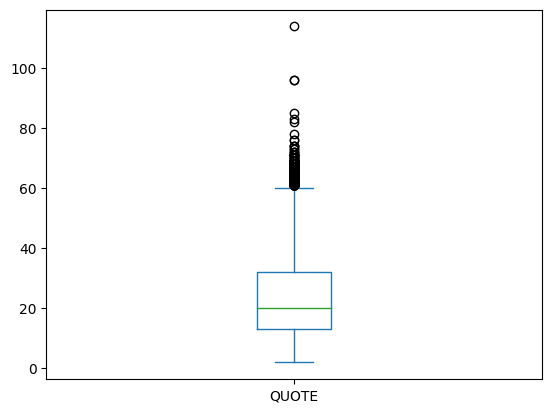

In [24]:
length_of_quotes.plot(kind ='box')

In [25]:
length_of_quotes.describe()

count    39223.000000
mean        23.741249
std         13.438313
min          2.000000
25%         13.000000
50%         20.000000
75%         32.000000
max        114.000000
Name: QUOTE, dtype: float64

There are 38223 records after dropping duplicates. The majority of our quotes have around 30 words in them.

Next steps:

1. Create embeddings for each sentence using sentence transformers
2. Visualize embedding and explore the similarity
3. Store the embeddings and quotes in a vector database.
4. Make pipeline to encode a given query to an embedding and perform similarity search in the vector database


# Creating Embeddings

There are multiple ways one can create embeddings(vector representations) for our input text.

Here are a few of the options:
1. Sentence Transformers
2. Tensorflow Universal Sentence Encoder module
3. Embeddings available from Hugging Face
4. Vertex AI embeddings (not free)
5. Open AI embeddings (not free)


In [26]:
# We use SentenceTransformer pre-trained models to convert our text into vectors.
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 55.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [27]:
from sentence_transformers import SentenceTransformer
from tqdm.notebook import tqdm

In [28]:
# This code will download and create a pre-trained sentence encoder

# all-MiniLM-L6-v2 - is a distilated (lightweight) version of MPNet model.
# It is optimized for fast inference.
# Full list of available models could be found here https://www.sbert.net/docs/pretrained_models.html

model = SentenceTransformer('all-MiniLM-L6-v2', device="cuda") # change runtime to GPU and device to "cuda"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [29]:
quotes_list = quotes["QUOTE"].tolist() #we need to input sentences as a list of strings into the model

In [30]:
len(quotes_list)

39223

In [31]:
corpus_embeddings = model.encode(quotes_list, show_progress_bar=True)

# batch size by default is 32.
#By default, a list of tensors is returned. If convert_to_tensor,
#a stacked tensor is returned. If convert_to_numpy, a numpy matrix is returned.

Batches:   0%|          | 0/1226 [00:00<?, ?it/s]

The command:

encode(sentences: Union[str, List[str]], batch_size: int = 32, show_progress_bar: Optional[bool] = None, output_value: str = 'sentence_embedding', convert_to_numpy: bool = True, convert_to_tensor: bool = False, device: Optional[str] = None, normalize_embeddings: bool = False)→ Union[List[torch.Tensor], numpy.ndarray, torch.Tensor]

Computes sentence embeddings with thes parameters:

sentences – the sentences to embed

batch_size – the batch size used for the computation

show_progress_bar – Output a progress bar when encode sentences

output_value – Default sentence_embedding, to get sentence embeddings. Can be set to token_embeddings to get wordpiece token embeddings. Set to None, to get all output values

convert_to_numpy – If true, the output is a list of numpy vectors. Else, it is a list of pytorch tensors.

convert_to_tensor – If true, you get one large tensor as return. Overwrites any setting from convert_to_numpy

device – Which torch.device to use for the computation

normalize_embeddings – If set to true, returned vectors will have length 1. In that case, the faster dot-product (util.dot_score) instead of cosine similarity can be used.

In [32]:
corpus_embeddings.shape

(39223, 384)

In [33]:
# embedding of one of the quote
corpus_embeddings[0]

array([-5.06935418e-02,  1.52244911e-01,  5.18263457e-03, -5.72325140e-02,
       -2.98109036e-02, -1.13969911e-02,  6.60251975e-02, -1.62955243e-02,
       -2.95835081e-02, -5.06800413e-02,  7.19874725e-02, -9.30693075e-02,
        8.27447101e-02, -1.54210357e-02, -1.85312461e-02, -2.59762686e-02,
       -2.82957889e-02,  1.22728590e-02, -5.86595722e-02,  7.29891211e-02,
       -6.73285276e-02, -1.23151578e-02, -3.45145119e-03,  2.56501641e-02,
       -3.39607298e-02,  5.47544658e-03, -6.34218520e-03, -4.88987006e-02,
       -1.20424582e-02,  9.94676799e-02,  1.75302178e-02,  9.73843131e-03,
        3.97323221e-02,  2.26778798e-02, -3.95081490e-02, -5.13978414e-02,
        6.96576610e-02, -6.42479807e-02, -2.23175008e-02,  4.57199626e-02,
        1.61028299e-02,  3.49459297e-04,  5.56455292e-02,  2.62832437e-02,
       -5.91292745e-03, -4.21931371e-02, -7.62625933e-02,  1.24685196e-02,
        7.81932622e-02,  2.82960441e-02,  5.39869210e-03,  8.84224325e-02,
       -4.21587341e-02, -

In [34]:
embedding_list = [element for element in corpus_embeddings]

In [35]:
# add the embedding list to the pandas dataframe
quotes["embeddings"] = embedding_list

In [36]:
quotes.sample()

,AUTHOR,QUOTE,embeddings
17750,Janet Jackson,When I'm feeling down on myself or not feeling...,"[0.0015561966, -0.00183453, 0.006980003, 0.068..."


Similarity and Visualization of an embedding:

1. How can one determine similarity ?
2. How can one visualize embeddings ?

There are different ways to determine similarity between two vectors:
1. Cosine Similarity (the angle between unit vectors)
2. Dot Product (the magnitude of similarity or dissimilarity)
3. Distance measure (Euclidean, Manhattan, etc.)

Within similarity are are some options:

-> Semantic textual similarity and topic modelling: Clustering similar sentences or finding the similar sentences in a given list.

-> Semantic Search: Given a query, search for similar meanings in sentences. This requires bi-encoding where the query needs to be encoded into an embedding, and then compared with other previously embedded sentence vectors using some scoring function (cosine similarity, dot product, distance).

-> HNSW: When dealing with large corpus of data, scoring query with each sentence embedding would become too expensive (compute and latency wise). Approximate Nearest Neighbor search algorithms are used to make the semantic search faster. These algorithms use HNSW - Heirachical Navigable Small World algorithm to index the sentence embeddings and perform approximate nearest neighbor search.

We will look at:

1. Clustering or general Semantic Textual Similarity
2. Semantic Search given a query
3. HNSW search (approximate NN Search)

In [37]:
from sentence_transformers import util

In [38]:
#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.cos_sim(corpus_embeddings[0:100], corpus_embeddings[0:100])

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)


In [39]:
pairs

[{'index': [67, 86], 'score': tensor(0.7144)},
 {'index': [77, 87], 'score': tensor(0.5753)},
 {'index': [30, 33], 'score': tensor(0.5598)},
 {'index': [65, 90], 'score': tensor(0.5529)},
 {'index': [84, 87], 'score': tensor(0.5392)},
 {'index': [74, 77], 'score': tensor(0.4893)},
 {'index': [77, 84], 'score': tensor(0.4841)},
 {'index': [69, 90], 'score': tensor(0.4820)},
 {'index': [66, 84], 'score': tensor(0.4781)},
 {'index': [42, 51], 'score': tensor(0.4756)},
 {'index': [79, 82], 'score': tensor(0.4756)},
 {'index': [50, 53], 'score': tensor(0.4620)},
 {'index': [87, 89], 'score': tensor(0.4599)},
 {'index': [74, 87], 'score': tensor(0.4595)},
 {'index': [66, 87], 'score': tensor(0.4406)},
 {'index': [64, 82], 'score': tensor(0.4403)},
 {'index': [50, 75], 'score': tensor(0.4370)},
 {'index': [64, 86], 'score': tensor(0.4362)},
 {'index': [32, 37], 'score': tensor(0.4356)},
 {'index': [70, 93], 'score': tensor(0.4353)},
 {'index': [80, 85], 'score': tensor(0.4311)},
 {'index': [2

In [40]:
# Top 10 similar quote pairs in first 100 quotes of the dataset

for pair in pairs[0:10]:
    i, j = pair['index']
    print(f'{quotes.iloc[i]["QUOTE"]}' + f' ~{quotes.iloc[i]["AUTHOR"]}'
              + '\n' + f'{quotes.iloc[j]["QUOTE"]}' + f' ~{quotes.iloc[j]["AUTHOR"]}' + '\n')



I see myself as sexy. If you are comfortable with it, it can be very classy and appealing. ~Aaliyah
I know that people think I'm sexy and I am looked at as that. It is cool with me. It's wonderful to have sexy appeal. If you embrace it, it can be a very beautiful thing. ~Aaliyah

I'm involved in some action scenes, so they'll train me for that. I'll be working with my acting coach to prepare for my character. ~Aaliyah
Because I came out as a singer, I took the time to get an acting coach. ~Aaliyah

You have to dream before your dreams can come true. ~A. P. J. Abdul Kalam
Great dreams of great dreamers are always transcended. ~A. P. J. Abdul Kalam

Keep working hard and you can get anything that you want. ~Aaliyah
It seems to me if you want something badly enough, whether you're a man or a woman, you'll do whatever you have to do to get it. ~Aaron Eckhart

I began to work the stage and get the audience into it. I also learned how to have fun out there. It is something I will never forge

In [ ]:
# when we are trying to get similarity for many sentences, the above method might overwhelm your compouting instance as it requires a lot of memory.

# Sentence Transformers recommends using their paraphrase mining function
# https://www.sbert.net/examples/applications/paraphrase-mining/README.html

paraphrases = util.paraphrase_mining(model, quotes_list, top_k=1)


In [ ]:
for paraphrase in paraphrases[0:10]:
    score, i, j = paraphrase
    print(f'{quotes.iloc[i]["QUOTE"]}' + f' ~{quotes.iloc[i]["AUTHOR"]}'
          + '\n' + f'{quotes.iloc[j]["QUOTE"]}' + f' ~{quotes.iloc[j]["AUTHOR"]}' + '\n' , score, f'\n')

The innocent and the beautiful Have no enemy but time. ~W.B. Yeats
The innocent and the beautiful have no enemy but time. ~William Butler Yeats
 1.0000005960464478 

'Tis better to have loved and lost Than never to have loved at all. ~Alfred
'Tis better to have loved and lost than never to have loved at all. ~Alfred Lord Tennyson
 1.0000003576278687 

My strength is as the strength of ten, Because my heart is pure. ~Alfred
My strength is as the strength of ten, because my heart is pure. ~Alfred Lord Tennyson
 1.000000238418579 

What's in a name? that which we call a rose  By any other name would smell as sweet. ~Shakespeare
What's in a name? That which we call a rose by any other name would smell as sweet. ~William Shakespeare
 1.000000238418579 

Heard melodies are sweet, but those unheard are sweeter. ~John Keats
Heard melodies are sweet, but those unheard  Are sweeter. ~John Keats
 0.9999997019767761 

When power leads man toward arrogance, poetry reminds him of his limitations. Wh

In [ ]:
for paraphrase in paraphrases[0:40]:
    score, i, j = paraphrase
    if quotes.iloc[i]["AUTHOR"] != quotes.iloc[j]["AUTHOR"]:
        print(f'{quotes.iloc[i]["QUOTE"]}' + f' ~{quotes.iloc[i]["AUTHOR"]}'
              + '\n' + f'{quotes.iloc[j]["QUOTE"]}' + f' ~{quotes.iloc[j]["AUTHOR"]}' , score, f'\n')


The innocent and the beautiful Have no enemy but time. ~W.B. Yeats
The innocent and the beautiful have no enemy but time. ~William Butler Yeats 1.0000005960464478 

'Tis better to have loved and lost Than never to have loved at all. ~Alfred
'Tis better to have loved and lost than never to have loved at all. ~Alfred Lord Tennyson 1.0000003576278687 

My strength is as the strength of ten, Because my heart is pure. ~Alfred
My strength is as the strength of ten, because my heart is pure. ~Alfred Lord Tennyson 1.000000238418579 

What's in a name? that which we call a rose  By any other name would smell as sweet. ~Shakespeare
What's in a name? That which we call a rose by any other name would smell as sweet. ~William Shakespeare 1.000000238418579 

To perceive Christmas through its wrappings becomes more difficult with every year. ~E. B. White
To perceive Christmas through its wrapping becomes more difficult with every year. ~E.B. White 0.9984083771705627 

The paradox of education is prec

The above exploration shows that there are lot of almost duplicate quotes that cannot be easily picked up by our pandas duplicates function. This is where the similarity search can be beneficial. There are also misattribution cases where same quotes are attributed for two authors.



2. Clustering:

In [41]:
from pprint import pprint

In [42]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings[:100]) #this will crash if done with entire dataset in colab
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(quotes_list[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    pprint(cluster)
    print("")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster  1
['Weeds are flowers too, once you get to know them.',
 'What I say is that, if a fellow really likes potatoes, he must be a pretty '
 'decent sort of fellow.',
 'To the uneducated, an A is just three sticks.',
 "Tiggers don't like honey.",
 'The best we can do, to paraphrase Pollan, is to eat whole foods, mostly '
 'plants, and not too much.',
 'I tried the paleo diet, which is the caveman diet - lots of meat. And I '
 'tried the calorie restriction diet: The idea is that if you eat very, very '
 "little - if you're on the verge of starvation, you will live a very long "
 'time, whether or not you want to, of course.',
 'My goal? To test out every diet and exercise regimen on planet earth and '
 'figure out which work best. I sweated, I cooked, I learned to pole dance. In '
 'the end, I lost weight, lowered my cholesterol and doubled my energy level. '
 'I feel better than I ever have.',
 "I was what they call 'skinny fat' - a body that resembled a python after "
 'swallowin

In [ ]:
#agglomerate clustering is similarly done using scikit learn

#see code: https://github.com/UKPLab/sentence-transformers/blob/master/examples/applications/clustering/agglomerative.py#

3. Fast Clustering:

Agglomerative Clustering for larger datasets is quite slow, so it is only applicable for maybe a few thousand sentences. Here a clustering algorithm that is tuned for large datasets (50k sentences in less than 5 seconds). In a large list of sentences it searches for local communities (a set of highly similar sentences.)

You can configure the threshold of cosine-similarity for which we consider two sentences as similar. Also, you can specify the minimal size for a local community. This allows you to get either large coarse-grained clusters or small fine-grained clusters."

In [43]:
# Two parameters to tune:
# min_cluster_size: Only consider cluster that have at least 25 elements
# threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar

# community_detection: algorithm expects a tensor as an input rather than a numpy array of tensors that we have right now,
# so one has to set convert_to_tensor=True and creating embeddings again.

corpus_embeddings_tensor = model.encode(quotes_list, batch_size=64, show_progress_bar=True, convert_to_tensor=True)


Batches:   0%|          | 0/613 [00:00<?, ?it/s]

In [ ]:
clusters = util.community_detection(corpus_embeddings_tensor, min_community_size=25, threshold=0.6)

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", quotes_list[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", quotes_list[sentence_id])


Cluster 1, #204 Elements 
	 As an actor, all you want to do is to work and do good work.
	 What I try to do as an actor is constantly find that, find ways to risk, find opportunities to fall on my face if it's going to be worth it, and then maybe I'll surprise myself.
	 To be a good actor you have to feel life and observe life.
	 ...
	 If I could wave a magic wand and be anything, I'd be a really respected, really successful author. That's a hard combination to get, though. I really enjoy acting, and it's easier, frankly.
	 I'm really not an actor of any kind. I've always seen myself as an entertainer, someone who makes people laugh. That's all I've ever wanted to do. 'Doctor Who' has always just been me, really.
	 I'm a reasonably good actor, and I'm an average naval officer. Ha, ha!

Cluster 2, #137 Elements 
	 Happiness depends more on how life strikes you than on what happens.
	 Happiness depends upon ourselves.
	 Happiness is when what you think, what you say, and what you do are

As we could see from the above clusters, each cluster is particularly contains quotes related to a particular topic such as  acting, failure, etc..

##Topical modelling

sources:

https://github.com/ddangelov/Top2Vec/tree/master

https://github.com/MaartenGr/BERTopic


Semantic Search:

In semantic search, one encodes the given query into a vector embedding and then performs cosin simiarity calculation with all the vector embeddings that we have previously encoded.

Issue: if there are numerous vector embeddings (>1 M) then performing cosin calculation with respect to each embedding would be too expensive and increases the latency. Therefore we use  Hierarchial Navigable Small Worlds (HNSW) libraries which only produce approximate Nearest neighbour results.

Source for Hierarchial Navigable Small Worlds:
https://arxiv.org/abs/1603.09320

To demonstrate Semantic Search:

1. Perform cosine similarity search
2. Use Sentence Transformers Semantic Search function
3. Compare Semantic Search with BM25 Lexical search and cross-encoder reranking
4. HNSW

In [44]:
# https://www.sbert.net/

from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Our sentences to encode
sentences = [
    "The quick brown fox jumps over the lazy dog."
]

# Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

# Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: The quick brown fox jumps over the lazy dog.
Embedding: [ 4.39335629e-02  5.89343533e-02  4.81783822e-02  7.75480941e-02
  2.67444029e-02 -3.76295894e-02 -2.60510854e-03 -5.99430501e-02
 -2.49601039e-03  2.20728349e-02  4.80259284e-02  5.57552911e-02
 -3.89454253e-02 -2.66168062e-02  7.69340713e-03 -2.62376424e-02
 -3.64160389e-02 -3.78161184e-02  7.40781575e-02 -4.95050587e-02
 -5.85217066e-02 -6.36196733e-02  3.24350260e-02  2.20085420e-02
 -7.10637420e-02 -3.31578106e-02 -6.94104061e-02 -5.00374399e-02
  7.46267810e-02 -1.11133806e-01 -1.23063112e-02  3.77456099e-02
 -2.80313231e-02  1.45353423e-02 -3.15585323e-02 -8.05836618e-02
  5.83525784e-02  2.59006885e-03  3.92802581e-02  2.57696025e-02
  4.98505905e-02 -1.75621570e-03 -4.55298014e-02  2.92607751e-02
 -1.02017216e-01  5.22287413e-02 -7.90899843e-02 -1.02857640e-02
  9.20249615e-03  1.30732516e-02 -4.04777639e-02 -2.77925059e-02
  1.24667380e-02  6.72833025e-02  6.81248158e-02 -7.57118966e-03
 -6.09943457e-03 -4.2377

In [45]:
# One can use semantic_search function provided by sentence transformers for a semantic query
# https://www.sbert.net/docs/package_reference/util.html

from sentence_transformers import util

queries = ['sentence transformers', 'ceiling fan']
query_embedding = model.encode(queries, convert_to_tensor=True)
hits = util.semantic_search(query_embedding, corpus_embeddings, top_k=5)


In [46]:
for item in hits:
    print(item)

[{'corpus_id': 13111, 'score': 0.5206369161605835}, {'corpus_id': 31672, 'score': 0.4243040382862091}, {'corpus_id': 10793, 'score': 0.4199885129928589}, {'corpus_id': 32938, 'score': 0.4185197353363037}, {'corpus_id': 31212, 'score': 0.40823906660079956}]
[{'corpus_id': 28822, 'score': 0.4355194568634033}, {'corpus_id': 23814, 'score': 0.4139110743999481}, {'corpus_id': 19317, 'score': 0.40674930810928345}, {'corpus_id': 15095, 'score': 0.3946298360824585}, {'corpus_id': 32231, 'score': 0.39436185359954834}]


In [47]:
hit1 = hits[0]      #Get the hits for the first query
for hit in hit1:
    print(quotes.iloc[hit['corpus_id']], "(Score: {:.4f})".format(hit['score']))


AUTHOR                                         Gaston Bachelard
QUOTE            The words of the world want to make sentences.
embeddings    [-0.0030139717, 0.03634331, 0.005327661, 0.040...
Name: 13126, dtype: object (Score: 0.5206)
AUTHOR                                           Robert Darnton
QUOTE                                 Texts are always in flux.
embeddings    [0.017670143, 0.0050771693, 0.032988653, 0.015...
Name: 31707, dtype: object (Score: 0.4243)
AUTHOR                               Elizabeth Barrett Browning
QUOTE         At painful times, when composition is impossib...
embeddings    [0.049867287, -0.020910028, 0.04368528, 0.0106...
Name: 10806, dtype: object (Score: 0.4200)
AUTHOR                                             Samuel Adams
QUOTE         How strangely will the Tools of a Tyrant perve...
embeddings    [0.002627284, 0.03568606, 0.03016805, 0.008996...
Name: 32973, dtype: object (Score: 0.4185)
AUTHOR                                      Richard Grant Wh

HNSW:

There are at least 4 ways to implement HNSW, and below we use the Facebook AI Similarity Search approach:

Faiss (Facebook AI Similarity Search) is an efficient open-source library designed for vector similarity search and indexing. Faiss is widely used for tasks involving large-scale vector datasets, such as image similarity search, natural language processing, and recommendation systems. Faiss focuses on accelerating vector searches by implementing state-of-the-art algorithms for similarity search and indexing.

Source: https://faiss.ai/index.html


In [ ]:
! pip install faiss-gpu

In [ ]:
import faiss

In [ ]:
from faiss import write_index, read_index

In [ ]:
def faiss_create_index(corpus_embeddings):
    d = corpus_embeddings.shape[1]
    print(d)
    index = faiss.IndexFlatL2(d)
    index.add(corpus_embeddings)
    print(index.is_trained)

    return index

def faiss_search(query, index, top_k = 5):
    query_list = [query]
    print(query_list)
    xq = model.encode(query_list)
    D, hits = index.search(xq, top_k)

    list_of_dicts = []

    print(hits[0])

    for hit in hits[0]:
        list_of_dicts.append(quotes.iloc[hit].to_dict())

    return list_of_dicts

In [ ]:
faiss_index = faiss_create_index(corpus_embeddings)
write_index(faiss_index, "large.index")
index = read_index("large.index")
result = faiss_search("news", index)

print(result)

384
True
['news']
[24534    60 11817 19784  8651]
[{'AUTHOR': 'Ludovic Halevy', 'QUOTE': 'No news is good news.', 'embeddings': array([ 9.06785652e-02,  5.62860668e-02,  2.60539502e-02,  6.44615069e-02,
       -8.48001521e-03,  1.46697955e-02, -9.76102203e-02, -4.27290872e-02,
       -2.91049257e-02,  6.29881173e-02,  8.75909030e-02,  3.96532044e-02,
       -6.34503504e-03,  1.84570905e-02, -2.19815113e-02,  8.71174689e-03,
        5.55165461e-04, -3.99535932e-02, -5.73862530e-02,  2.46072058e-02,
       -9.60872918e-02,  1.66505761e-02,  8.31641033e-02,  1.81493852e-02,
       -4.67888266e-02, -2.32201302e-03, -1.45950951e-02, -1.09381109e-01,
       -1.24322884e-02, -3.88864651e-02, -9.16415080e-02, -1.76936872e-02,
        3.61772953e-03, -4.99045067e-02,  8.38876516e-02, -3.87524925e-02,
        4.69779633e-02, -3.38834003e-02,  1.14380559e-02, -2.41522528e-02,
        7.97084570e-02, -3.32360342e-02, -5.08728810e-02,  2.17481852e-02,
        7.62680545e-04,  2.69240793e-02, -3.373

# Visualizing embeddings

https://arize.com/blog-course/reduction-of-dimensionality-top-techniques/

Here is another video on visualizing embeddings:

https://www.youtube.com/watch?v=wvsE8jm1GzE&ab_channel=GoogleforDevelopers

In [48]:
# UMAP is can be used to visualize UMAP in 2D or 3D space.
! pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 5.3 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=1391eed097c977971c8413d9ff34c24e39514275526e8bededc0b4251112fe56
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [49]:
import umap

#Intuition: https://pair-code.github.io/understanding-umap/

In [50]:
mapper = umap.UMAP().fit(corpus_embeddings)

#Details: https://umap-learn.readthedocs.io/en/latest/plotting.html

In [51]:
!pip install matplotlib datashader bokeh holoviews

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 15.2 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)
/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

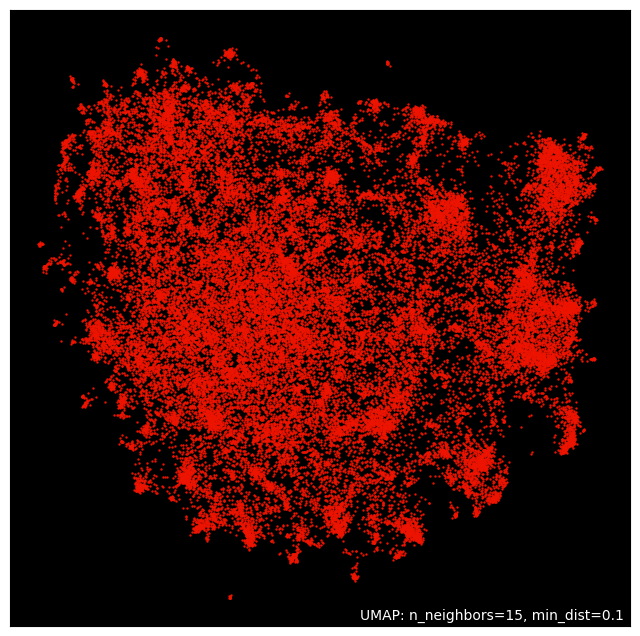

In [52]:
import umap.plot
umap.plot.points(mapper, theme='fire')
#umap.plot.points(mapper, labels=pendigits.target)

# This UMAP visualization represents a dataset of 39,223 quotes (each quote represented as a red dot),
# each transformed into a 384-dimensional embedding and projected onto a 2D space.
# The visualization allows for the examination of semantic relationships and potential thematic clusters
# within the dataset
